In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('../Dataset/Processed/gurgaon_properties_outlier_treated.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 7,0.45,5000.0,900.0,Plot area 900(83.61 sq.m.),3.0,2.0,1,2.0,North-West,Old Property,NaN,900.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,12.0,300.000000
1,flat,m3m woodshire,sector 107,1.20,6176.0,1943.0,Super Built up area 1943(180.51 sq.m.)Built Up...,3.0,3.0,3,7.0,South,Relatively New,1943.0,1750.0,1550.00,0.0,0.0,0.0,0.0,0.0,0.0,49.0,647.666667
2,flat,godrej icon,sector 88,1.75,14894.0,1175.0,Carpet area: 1175.11,3.0,3.0,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0.0,0.0,0.0,0.0,0.0,1.0,55.0,391.666667
3,flat,the lions cghs,sector 56,2.00,8333.0,2400.0,Super Built up area 2400(222.97 sq.m.)Carpet a...,4.0,4.0,3,8.0,West,Relatively New,2400.0,NaN,2100.00,0.0,0.0,0.0,0.0,1.0,0.0,49.0,600.000000
4,flat,puri emerald bay,sector 104,2.65,15006.0,1766.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3.0,4.0,3,15.0,North-East,Relatively New,2450.0,NaN,1765.73,0.0,1.0,0.0,0.0,0.0,0.0,174.0,588.666667


In [3]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1011
agePossession             0
super_built_up_area    1678
built_up_area          1967
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

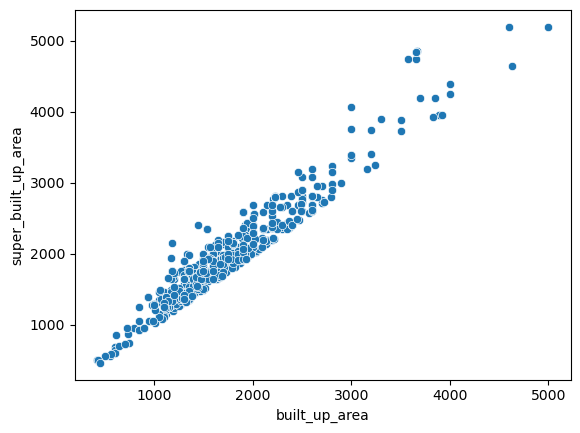

In [4]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

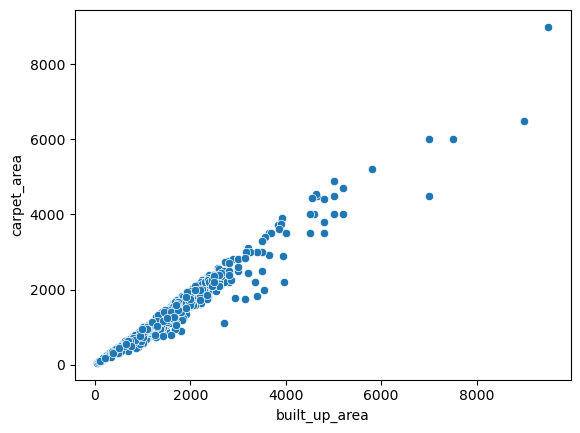

In [5]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [6]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).sum()

0

In [7]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [8]:
all_present_df.shape

(531, 24)

In [9]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [10]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [11]:
sbc_df.shape

(421, 24)

In [12]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3,flat,the lions cghs,sector 56,2.00,8333.0,2400.0,Super Built up area 2400(222.97 sq.m.)Carpet a...,4.0,4.0,3,8.0,West,Relatively New,2400.0,NaN,2100.00,0.0,0.0,0.0,0.0,1.0,0.0,49.0,600.000000
4,flat,puri emerald bay,sector 104,2.65,15006.0,1766.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3.0,4.0,3,15.0,North-East,Relatively New,2450.0,NaN,1765.73,0.0,1.0,0.0,0.0,0.0,0.0,174.0,588.666667
15,flat,godrej nature plus,sector 33,1.40,15119.0,926.0,Super Built up area 145Carpet area: 86 sq.m.,3.0,2.0,3+,20.0,NaN,New Property,145.0,NaN,86.00,0.0,0.0,0.0,0.0,0.0,1.0,70.0,308.666667
21,flat,puri emerald bay,sector 104,2.25,10465.0,2150.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3.0,4.0,3+,4.0,North,Relatively New,2450.0,NaN,2150.00,0.0,1.0,0.0,0.0,0.0,0.0,159.0,716.666667
30,flat,imperia the esfera,sector 37,0.98,5399.0,1815.0,Super Built up area 1815(168.62 sq.m.)Carpet a...,3.0,4.0,3,9.0,South-West,Relatively New,1815.0,NaN,1510.00,0.0,1.0,0.0,0.0,1.0,1.0,49.0,605.000000


In [13]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/var/folders/z4/11lhzcvx4_j57cvc149hhsm80000gn/T/ipykernel_93117/1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [14]:
df.update(sbc_df)

In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1011
agePossession             0
super_built_up_area    1678
built_up_area          1546
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [16]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [17]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
16,flat,ireo skyon,sector 60,3.75,13393.0,2800.0,Super Built up area 2800(260.13 sq.m.),4.0,5.0,3,15.0,South,Relatively New,2800.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,167.0,700.000000
17,flat,ramsons kshitij,sector 95,0.22,6471.0,340.0,Super Built up area 340(31.59 sq.m.),1.0,1.0,1,2.0,NaN,New Property,340.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,340.000000
18,flat,avl 36 gurgaon,sector 36,0.45,9000.0,500.0,Super Built up area 500(46.45 sq.m.),1.0,1.0,1,9.0,NaN,Relatively New,500.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,500.000000
22,flat,m3m merlin,sector 67,2.78,13581.0,2047.0,Super Built up area 2047(190.17 sq.m.),3.0,3.0,3+,4.0,South-West,Relatively New,2047.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,157.0,682.333333
23,flat,la vida by tata housing,sector 113,1.50,11755.0,1276.0,Super Built up area 1276(118.54 sq.m.),2.0,2.0,2,13.0,NaN,New Property,1276.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,60.0,638.000000


In [18]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/var/folders/z4/11lhzcvx4_j57cvc149hhsm80000gn/T/ipykernel_93117/1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [19]:
df.update(sb_df)

In [20]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1011
agePossession             0
super_built_up_area    1678
built_up_area           671
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [21]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [22]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2,flat,godrej icon,sector 88,1.75,14894.0,1175.0,Carpet area: 1175.11,3.0,3.0,3+,6.0,NaN,New Property,NaN,NaN,1175.110000,0.0,0.0,0.0,0.0,0.0,1.0,55.0,391.666667
11,flat,vasant appartments,sector 14,1.70,7391.0,2300.0,Carpet area: 2300 (213.68 sq.m.),5.0,5.0,2,2.0,North-West,Old Property,NaN,NaN,2300.000000,1.0,0.0,1.0,1.0,0.0,2.0,71.0,460.000000
12,house,independent,sector 12,6.00,35088.0,1710.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,4.0,6.0,2,2.0,North-East,Old Property,NaN,NaN,1600.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,427.500000
13,flat,rof ananda,sector 95,0.20,5464.0,366.0,Carpet area: 366.08 (34.01 sq.m.),1.0,1.0,1,10.0,West,Relatively New,NaN,NaN,366.080239,0.0,0.0,0.0,0.0,0.0,1.0,82.0,366.000000
19,flat,signature global city 81,sector 81,0.80,14652.0,546.0,Carpet area: 546 (50.73 sq.m.),2.0,2.0,2,4.0,North,Under Construction,NaN,NaN,546.000000,1.0,0.0,0.0,0.0,0.0,1.0,36.0,273.000000


In [23]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/var/folders/z4/11lhzcvx4_j57cvc149hhsm80000gn/T/ipykernel_93117/2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [24]:
df.update(c_df)

In [25]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1011
agePossession             0
super_built_up_area    1678
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

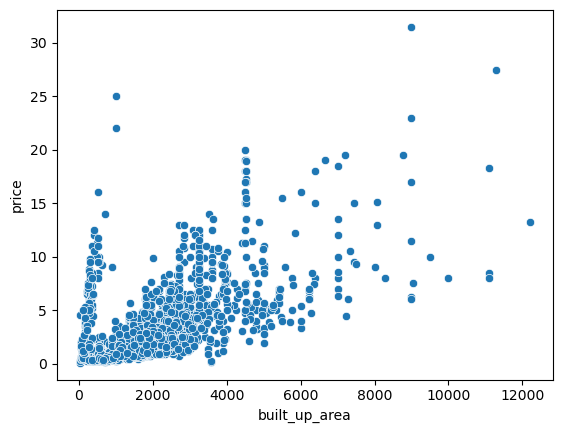

In [26]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [27]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [28]:
anamoly_df.sample(5)

,price,area,built_up_area
3337,4.49,1836.0,1836.0
20,6.40,2592.0,240.0
2248,8.80,2115.0,267.0
2341,2.51,2093.0,1894.0
2024,3.00,1828.0,1654.0


In [29]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [30]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

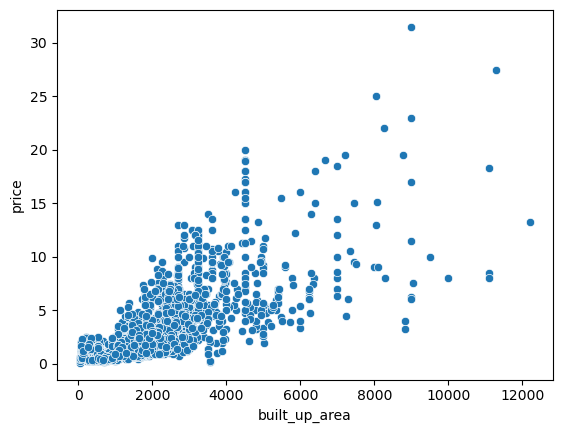

In [31]:
sns.scatterplot(x= df['built_up_area'],y= df['price'])

In [32]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [33]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 7,0.45,5000.0,3.0,2.0,1,2.0,North-West,Old Property,900.0,0.0,0.0,0.0,0.0,1.0,1.0,12.0
1,flat,m3m woodshire,sector 107,1.20,6176.0,3.0,3.0,3,7.0,South,Relatively New,1750.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
2,flat,godrej icon,sector 88,1.75,14894.0,3.0,3.0,3+,6.0,NaN,New Property,1306.0,0.0,0.0,0.0,0.0,0.0,1.0,55.0
3,flat,the lions cghs,sector 56,2.00,8333.0,4.0,4.0,3,8.0,West,Relatively New,2253.0,0.0,0.0,0.0,0.0,1.0,0.0,49.0
4,flat,puri emerald bay,sector 104,2.65,15006.0,3.0,4.0,3,15.0,North-East,Relatively New,2090.0,0.0,1.0,0.0,0.0,0.0,0.0,174.0


In [34]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             16
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [35]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
39,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
68,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4.0,3+,NaN,West,Moderately Old,2800.0,0.0,1.0,0.0,1.0,0.0,0.0,130.0
429,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,1.0,88.0
732,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1199,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0
1266,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1286,house,ansal sushant lok,sector 43,10.50,27911.0,4.0,4.0,2,NaN,North-East,Old Property,3762.0,0.0,1.0,0.0,0.0,0.0,1.0,59.0
1325,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
1741,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1748,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [36]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [37]:
df['floorNum'].fillna(2.0,inplace=True)

In [38]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### facing

<Axes: ylabel='facing'>

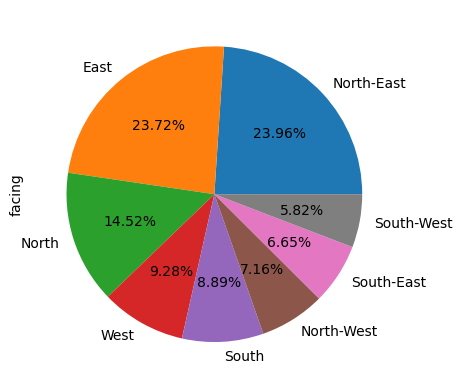

In [39]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [40]:
df.drop(columns=['facing'],inplace=True)

In [41]:
df.drop(index=[3151],inplace=True)

In [42]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [43]:
df['agePossession'].value_counts()

Relatively New        1604
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     262
Name: agePossession, dtype: int64

In [44]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
36,house,independent,sector 13,2.25,6944.0,10.0,10.0,2,1.0,Undefined,400.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
60,flat,mapsko mount ville,sector 79,1.65,9091.0,3.0,3.0,0,12.0,Undefined,1815.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
97,flat,the serenas,sector 36,0.42,7910.0,2.0,2.0,1,3.0,Undefined,590.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
100,flat,tulip petals,sector 89,1.10,7097.0,3.0,2.0,3,4.0,Undefined,1550.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
111,flat,trisara our homes 3,sohna road,0.40,4479.0,2.0,2.0,2,1.0,Undefined,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3508,flat,raheja sampada,sector 92,0.70,4453.0,3.0,3.0,0,7.0,Undefined,1572.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3526,house,independent,sector 105,1.15,3285.0,3.0,2.0,1,1.0,Undefined,3889.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3529,house,independent,sector 21,0.45,8411.0,3.0,2.0,1,1.0,Undefined,594.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3530,flat,unitech sunbreeze,sector 69,1.00,5476.0,4.0,3.0,0,0.0,Undefined,1826.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [46]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [47]:
df['agePossession'].value_counts()

Relatively New        1718
New Property           592
Moderately Old         585
Old Property           324
Under Construction     280
Undefined               53
Name: agePossession, dtype: int64

In [48]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [49]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [50]:
df['agePossession'].value_counts()

Relatively New        1726
New Property           593
Moderately Old         592
Old Property           327
Under Construction     280
Undefined               34
Name: agePossession, dtype: int64

In [51]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [52]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [53]:
df['agePossession'].value_counts()

Relatively New        1728
Moderately Old         624
New Property           593
Old Property           327
Under Construction     280
Name: agePossession, dtype: int64

In [54]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [55]:
df.shape

(3552, 18)

In [56]:
df.to_csv('../Dataset/Processed/gurgaon_properties_missing_value_imputation.csv',index=False)